### Written by Federica B. Bianco @fedhere
### NYU CUSP PUI
### Assignment 1 Homework 3
### This is a skeleton & instruction notebook
- ### GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
### _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
- ### For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
- ### Describe the behavior you see in the plots in terms of the law of large numbers.
- ### PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
### Extra Credit: FIT a gaussian to the distribution of means            

In [1]:
from __future__ import print_function
__author__= 'bs3639'

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
    
%pylab inline
matplotlib.rcParams['figure.figsize'] = 12, 6
plt.rcParams['axes.titlesize'] = 20

Populating the interactive namespace from numpy and matplotlib


In [2]:
# don't forget to set the seed!
np.random.seed(123456)

# sample size bounds
lower = 10
upper = 2000
n_sample_sets = 100
mymean = 100

# container for all our distributions
distributions = {}

def mean_line():
    '''Helper function to plot the mean as a line'''
    plt.plot([min(sample_sizes), max(sample_sizes)], [mymean]*2, 'k')

In [3]:
# Create random sample sizes
sample_sizes = np.random.uniform(lower, upper, size=n_sample_sets).astype(int)

# Do it for the Normal distribution


In [4]:
# Calculate sample means
distributions['normal'] = [
    np.random.normal(mymean, scale=1, size=N).mean()
    for N in sample_sizes
]
# For the record, I find this more easily readable than mixing your data in dicts :)

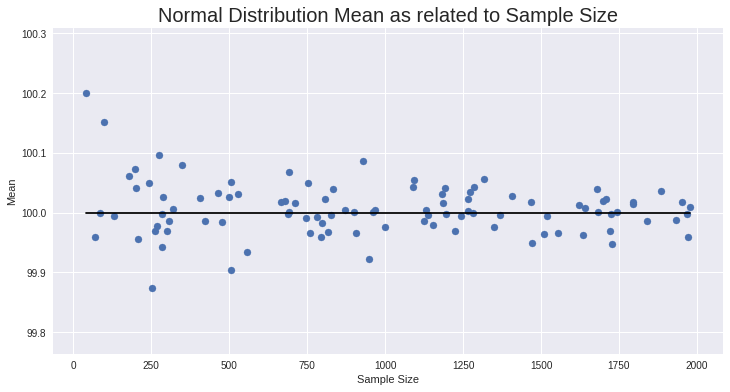

In [5]:
# Plot as a function of sample size
mean_line()
plt.scatter(sample_sizes, distributions['normal'])
plt.title('Normal Distribution Mean as related to Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Mean');

### Figure 1: The distribution of Normal distribution sample means as sample size increases.

Figure 1, above demonstrates the Central Limit Theorem, showing that as the sample size increases, the sample mean converges on the population mean.

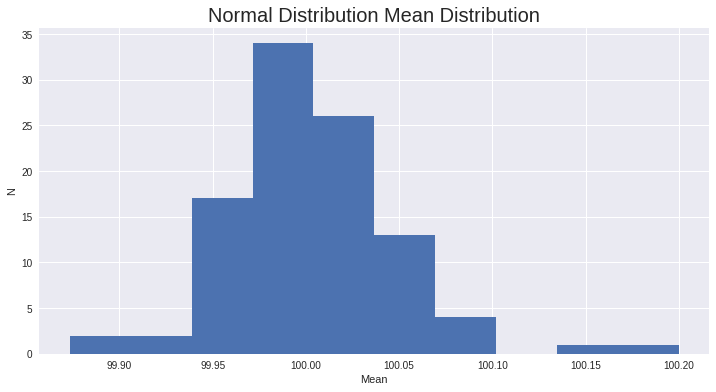

In [6]:
# Plot a histogram of sample means
plt.hist(distributions['normal'])
plt.title('Normal Distribution Mean Distribution')
plt.xlabel('Mean')
plt.ylabel('N');

### Figure 2: The distribution of Normal distribution sample means.

# Do it for the Poisson distribution

In [7]:
# Calculate sample means
distributions['poisson'] = [
    np.random.poisson(lam=mymean, size=N).mean()
    for N in sample_sizes
]

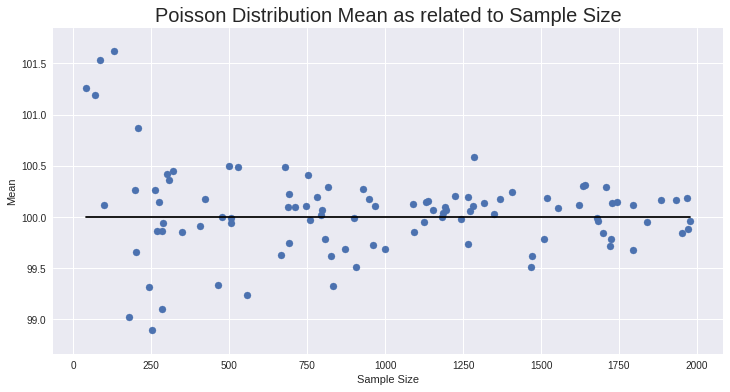

In [8]:
# Plot as a function of sample size
mean_line()
plt.scatter(sample_sizes, distributions['poisson'])
plt.title('Poisson Distribution Mean as related to Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Mean');

### Figure 3: The distribution of Poisson distribution sample means as sample size increases.

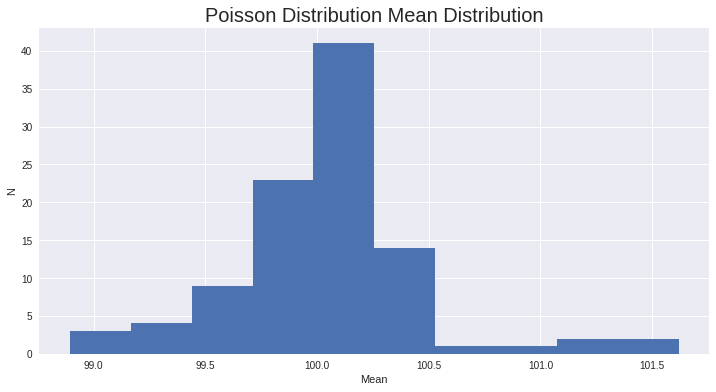

In [9]:
# Plot a histogram of sample means
plt.hist(distributions['poisson'])
plt.title('Poisson Distribution Mean Distribution')
plt.xlabel('Mean')
plt.ylabel('N');

### Figure 4: The distribution of Poisson distribution sample means.

# Do it for the Binomial distribution

In [10]:
# Calculate sample means
distributions['binomial'] = [
    np.random.binomial(n=mymean*2, p=0.5, size=N).mean()
    for N in sample_sizes
]

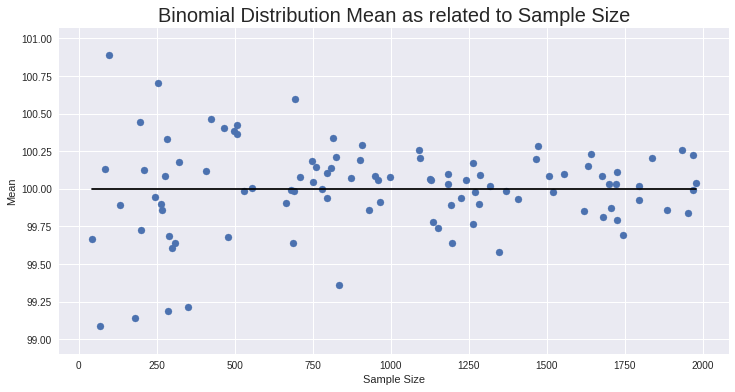

In [11]:
# Plot as a function of sample size
mean_line()
plt.scatter(sample_sizes, distributions['binomial'])
plt.title('Binomial Distribution Mean as related to Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Mean');

### Figure 5: The distribution of Binomial distribution sample means as sample size increases.

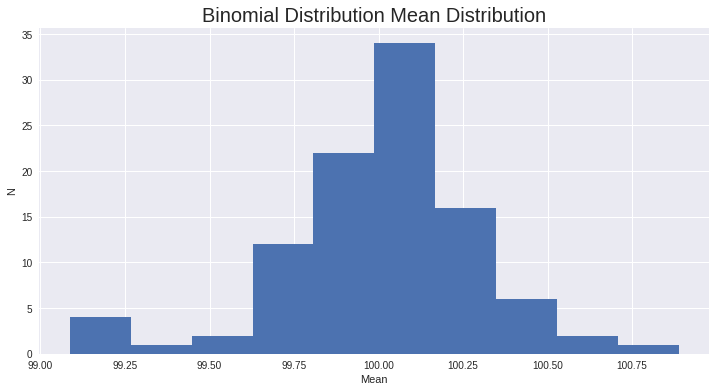

In [12]:
# Plot a histogram of sample means
plt.hist(distributions['binomial'])
plt.title('Binomial Distribution Mean Distribution')
plt.xlabel('Mean')
plt.ylabel('N');

### Figure 6: The distribution of Binomial distribution sample means.

# Do it for another distribution
I chose logistic.

In [13]:
# Calculate sample means
distributions['logistic'] = [
    np.random.logistic(loc=mymean, scale=1, size=N).mean()
    for N in sample_sizes
]

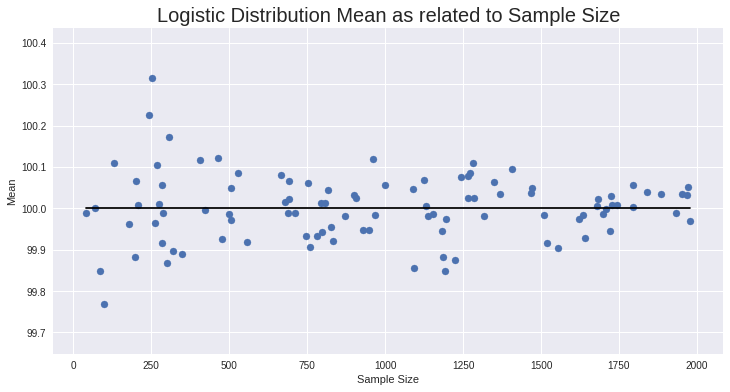

In [14]:
# Plot as a function of sample size
mean_line()
plt.scatter(sample_sizes, distributions['logistic'])
plt.title('Logistic Distribution Mean as related to Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Mean');

### Figure 7: The distribution of Logistic distribution sample means as sample size increases.

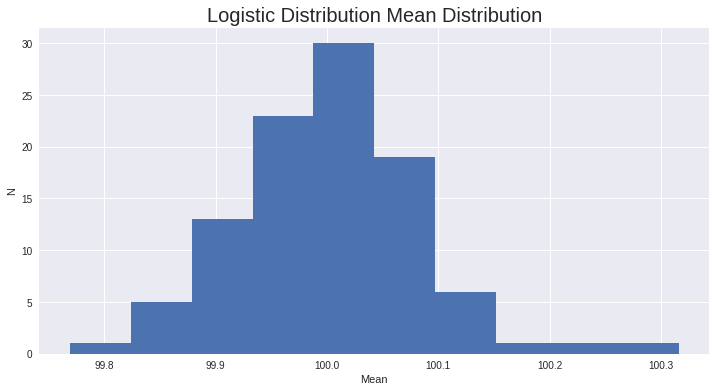

In [15]:
# Plot a histogram of sample means
plt.hist(distributions['logistic'])
plt.title('Logistic Distribution Mean Distribution')
plt.xlabel('Mean')
plt.ylabel('N');

### Figure 8: The distribution of Logistic distribution sample means.

# I also did the Chi Squared again. 
I wasn't sure if what you did above counted in the 5 distributions

In [16]:
# Calculate sample means
distributions['chi2'] = [
    np.random.chisquare(df=mymean, size=N).mean()
    for N in sample_sizes
]

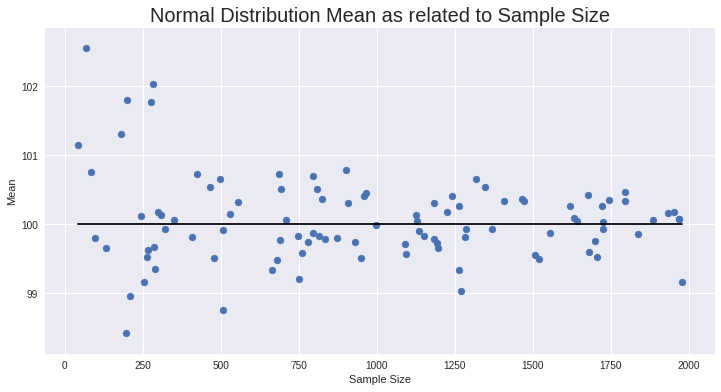

In [17]:
# Plot as a function of sample size
mean_line()
plt.scatter(sample_sizes, distributions['chi2'])
plt.title('Normal Distribution Mean as related to Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Mean');

### Figure 9: The distribution of Chi Squared sample means as sample size increases.

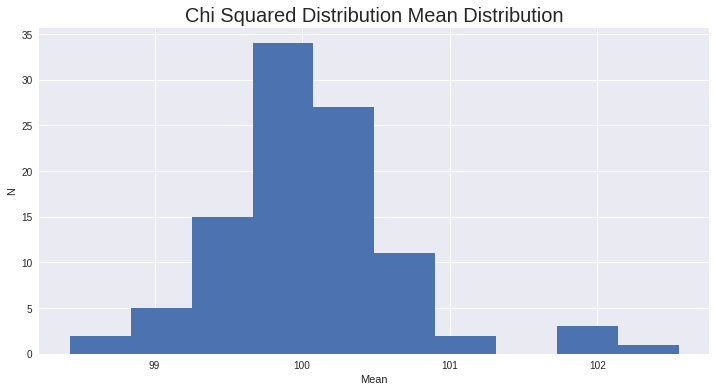

In [18]:
# Plot a histogram of sample means
plt.hist(distributions['chi2'])
plt.title('Chi Squared Distribution Mean Distribution')
plt.xlabel('Mean')
plt.ylabel('N');

### Figure 10: The distribution of Chi Squared sample means.

## The distribution of all distribution sample means

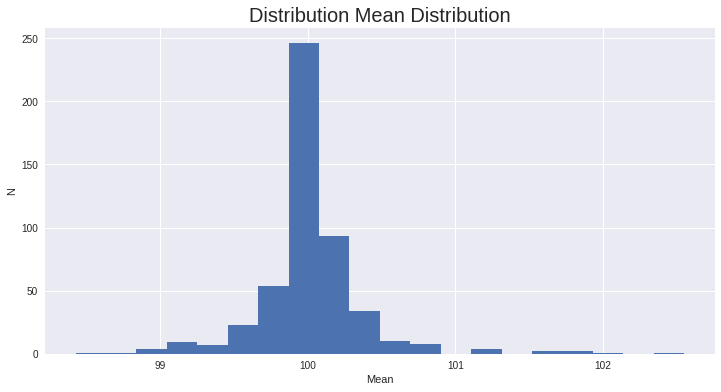

In [19]:
allmeans = [m for dist in distributions.values() for m in dist]

# Plot the distribution of all means from all distributions
plt.hist(allmeans, bins=20)
plt.title('Distribution Mean Distribution')
plt.xlabel('Mean')
plt.ylabel('N');

### Figure 11: The distribution of all sample means from all distributions.

## Extra Credit

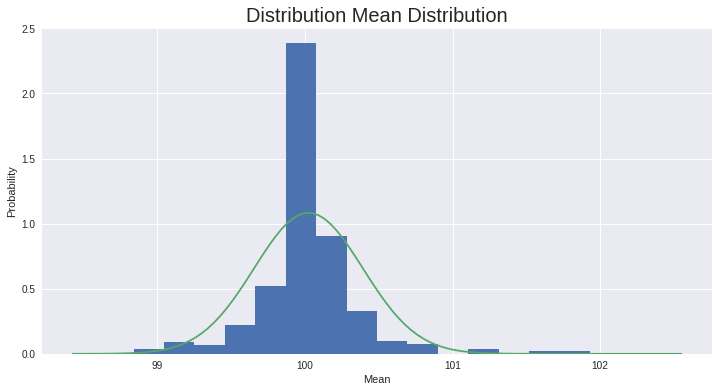

In [20]:
# Plot the sample distribution
plt.hist(allmeans, bins=20, normed=True)
plt.title('Distribution Mean Distribution')
plt.xlabel('Mean')
plt.ylabel('Probability')

# Plot the fitted gaussian
x = np.linspace(np.min(allmeans), np.max(allmeans), 100)
plt.plot(x, mlab.normpdf(x, np.mean(allmeans), np.std(allmeans)));

### Figure 12: The distribution of all sample means fit to a normal distribution.